### 1. IMPORTACIÓN DE LIBRERÍAS (Y OTROS)

El primer paso. Importar las librerías que puedan ser necesarias a lo largo del código así como las configuraciones que creo me ayudarán a lo largo del código (ignorar los warnings o ampliar el máximo de filas "visibles" a 150).

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings

In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 150)

### 2. LECTURA DEL ARCHIVO Y PRIMEROS PASOS

Lectura de los tres archivos que contienen los datasets de las tres principales causas de muerte en España en el periodo 1980-2020. En este caso, archivos ".csv" separados por ";". Además, indico que el separador del punto es el separador de miles para evitar conflictos a la hora de convertir la columna de los "Totales" a "int". También tengo que especificar el código "latin1" ya que la importación da error.

In [4]:
circulatorias = pd.read_csv('ESP_circulatorias_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
tumores = pd.read_csv('ESP_tumores_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
parasitarias = pd.read_csv('ESP_parasitarias_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')

### 3. PROCESO DE LIMPIEZA DE LOS DATOS

Tras la conversión de los archivos ".csv" en un dataframe cada uno, procedo a eliminar aquellas columnas que no voy a utiliar. Como he trabajado con estos mismos "dataset" anteriormente, el proceso es más rápido.

In [5]:
circulatorias.drop(['Edad', 'Sexo'], axis=1, inplace=True)
tumores.drop(['Edad', 'Sexo'], axis=1, inplace=True)
parasitarias.drop(['Edad', 'Sexo'], axis=1, inplace=True)

In [6]:
# Aquí limpio los nombres de la columna "Causa de muerte" de cada dataset y los añado a una lista vacía que posteriormente será la columna "Causa".

list_circulatorias = []

for i in circulatorias['Causa de muerte']:
    i = i[4:]
    list_circulatorias.append(i)

list_tumores = []

for i in tumores['Causa de muerte']:
    i = i[4:]
    list_tumores.append(i)

list_parasitarias = []

for i in parasitarias['Causa de muerte']:
    i = i[4:]
    list_parasitarias.append(i)

In [7]:
circulatorias['Circulatorias'] = list_circulatorias
tumores['Tumores'] = list_tumores
parasitarias['Parasitarias'] = list_parasitarias

In [8]:
circulatorias.drop('Causa de muerte', axis = 1, inplace=True)
tumores.drop('Causa de muerte', axis = 1, inplace=True)
parasitarias.drop('Causa de muerte', axis = 1, inplace=True)

### 4. PRIMER Y ÚNICO GRÁFICO

Creo las variables que contendrán los datos para el año 2020 de cada dataframe. A continuación, selecciono las tres primeras causas de muerte de cada dataframe en función a sus totales en el año 2020. Por último, creo el gráfico que comparará los datos de los tres dataframe en tres sub-gráficos.

In [9]:
circulatorias_2020 = circulatorias[circulatorias['Periodo'] == 2020]
circulatorias_2020.reset_index(inplace=True)
circulatorias_2020.drop('index', axis=1, inplace=True)
circulatorias_2020.sort_values('Total', ascending=False, inplace=True)

tumores_2020 = tumores[tumores['Periodo'] == 2020]
tumores_2020.reset_index(inplace=True)
tumores_2020.drop('index', axis=1, inplace=True)
tumores_2020.sort_values('Total', ascending=False, inplace=True)

parasitarias_2020 = parasitarias[parasitarias['Periodo'] == 2020]
parasitarias_2020.reset_index(inplace=True)
parasitarias_2020.drop('index', axis=1, inplace=True)
parasitarias_2020.sort_values('Total', ascending=False, inplace=True)

In [10]:
circulatorias_2020 = circulatorias_2020[0:3]
tumores_2020= tumores_2020[0:3]
parasitarias_2020 = parasitarias_2020[0:3]

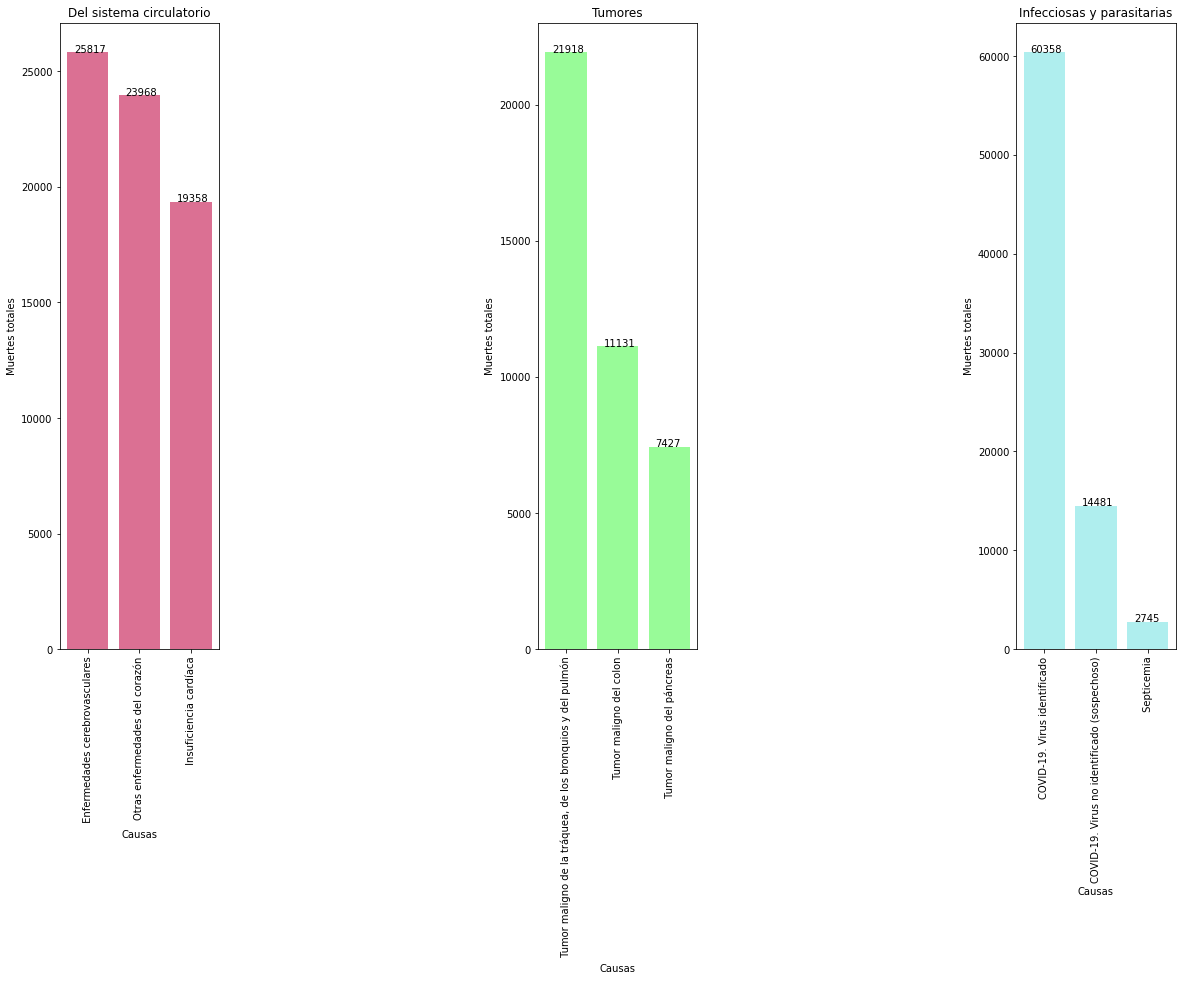

In [23]:
plt.figure(figsize=(20,15))

x1 = circulatorias_2020['Circulatorias']
y1 = circulatorias_2020['Total']

ax = plt.subplot(1,3,1)
plt.bar(x1, y1)
plt.title('Del sistema circulatorio')
ax.set_xticks(circulatorias_2020['Circulatorias'])
ax.set_xticklabels(circulatorias_2020['Circulatorias'], rotation=90)
ax.set_xlabel('Causas')
ax.set_ylabel('Muertes totales')

for bar in plt.bar(x1, y1, color = 'palevioletred'):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/6
    label = y_value
    plt.text(x_value, y_value, label)

x2 = tumores_2020['Tumores']
y2 = tumores_2020['Total']

ax = plt.subplot(1,3,2)
plt.bar(x2, y2)
plt.title('Tumores')
ax.set_xticks(x2)
ax.set_xticklabels(x2, rotation=90)
ax.set_xlabel('Causas')
ax.set_ylabel('Muertes totales')
# ax.set_xticklabels(y2)

for bar in plt.bar(x2, y2, color = 'palegreen'):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/6
    label = y_value
    plt.text(x_value, y_value, label)

x3 = parasitarias_2020['Parasitarias']
y3 = parasitarias_2020['Total']

ax = plt.subplot(1,3,3)
plt.bar(x3, y3)
plt.title('Infecciosas y parasitarias')
ax.set_xticks(x3)
ax.set_xticklabels(x3, rotation=90)
ax.set_xlabel('Causas')
ax.set_ylabel('Muertes totales')
# ax.set_xticklabels(y3)

for bar in plt.bar(x3, y3, color = 'paleturquoise'):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/6
    label = y_value
    plt.text(x_value, y_value, label)

plt.subplots_adjust(wspace=2, bottom=0.3)
plt.show()
plt.close('all')